In [1]:
import numpy as np
from faiss.contrib.evaluation import knn_intersection_measure
import faiss
import sys


class Object(object):
    pass


self = Object()
self.root = "/checkpoint/marialomeli/offline_faiss/ssnpp/"

self.eval_dir = self.root + "ssnpp_1B_in_ssnpp_1B/eval"

self.k = 50
index_strings = [
    #"IVF16384_PQ128",
    #"IVF16384_PQ64",
    #"IVF32768_PQ128",
    #"IVF32768_PQ64",
    #"IVF8192_PQ64",
    #"IVF8192_PQ128",
    "IVF16384_PQ32",
    "IVF32768_PQ32",
    "IVF8192_PQ32",
]
colors = ["g", "b", "r", "m", "y", "c"]  #'k' for baseline
I_a_gt_file = f"{self.eval_dir}/I_a_gt.npy"
I_a_gt = np.load(I_a_gt_file)
all_knn = []
nprobes = sorted([128,256,512,1024,2048,4096,8192,16384,65536])# 

for index_factory_fn in index_strings:
    helper = []
    for nprobe in nprobes:
        I_a_ann_file = f"{self.eval_dir}/I_a_ann_{index_factory_fn}_np{nprobe}.npy"
        I_a_ann = np.load(I_a_ann_file)
        print(
            f"I_a_ann_{index_factory_fn}_np{nprobe}.npy knn intersection measure with nprobe {nprobe}: {knn_intersection_measure(I_a_gt, I_a_ann)}"
        )
        helper.append(knn_intersection_measure(I_a_gt, I_a_ann))
    all_knn.append(helper)

I_a_ann_IVF16384_PQ32_np128.npy knn intersection measure with nprobe 128: 0.202794
I_a_ann_IVF16384_PQ32_np256.npy knn intersection measure with nprobe 256: 0.209162
I_a_ann_IVF16384_PQ32_np512.npy knn intersection measure with nprobe 512: 0.21398
I_a_ann_IVF16384_PQ32_np1024.npy knn intersection measure with nprobe 1024: 0.217694
I_a_ann_IVF16384_PQ32_np2048.npy knn intersection measure with nprobe 2048: 0.219768
I_a_ann_IVF16384_PQ32_np4096.npy knn intersection measure with nprobe 4096: 0.220406
I_a_ann_IVF16384_PQ32_np8192.npy knn intersection measure with nprobe 8192: 0.22004
I_a_ann_IVF16384_PQ32_np16384.npy knn intersection measure with nprobe 16384: 0.219566
I_a_ann_IVF16384_PQ32_np65536.npy knn intersection measure with nprobe 65536: 0.219566
I_a_ann_IVF32768_PQ32_np128.npy knn intersection measure with nprobe 128: 0.198658
I_a_ann_IVF32768_PQ32_np256.npy knn intersection measure with nprobe 256: 0.20595
I_a_ann_IVF32768_PQ32_np512.npy knn intersection measure with nprobe 512: 

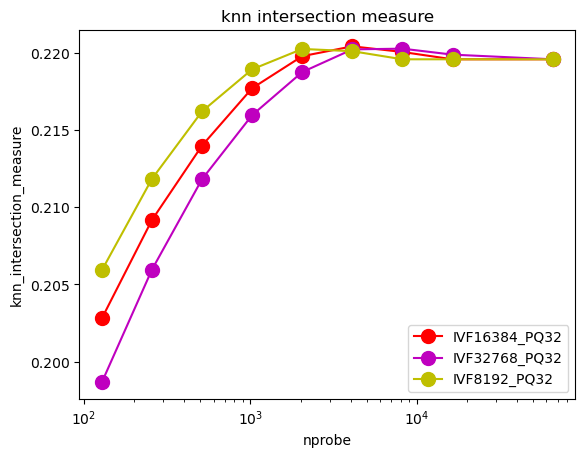

In [4]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

for i, knn in enumerate(all_knn):
    plt.plot(nprobes, knn, "o-", markersize=10, color=colors[i+2], label=index_strings[i])
plt.xscale("log")
plt.xlabel("nprobe")
plt.ylabel("knn_intersection_measure")
plt.savefig("logscale_knn_intesection_metric.pdf")
plt.title("knn intersection measure")
plt.legend()
plt.show()